<a href="https://colab.research.google.com/github/ssubbinn/ESAA-OB/blob/main/6%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Facebook의 fasttext를 이용한 text classification

In [1]:
pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 430.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.4-py3-none-any.whl (222 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp39-cp39-linux_x86_64.whl size=4395814 sha256=d36dc2d57a96f6a42f04f638d883aa825ddab56e82adef83f7998b2f73859f77
  Stored in directory: /root/.cache/pip/wheels/64/57/bc/1741406019061d5664914b070bd3e71f6244648732bc96109e
Successfully built fasttext


In [2]:
import fasttext

In [ ]:
# # Word Representation
# # Skipgram model :
# skip_model = fasttext.train_unsupervised('./author.txt', model='skipgram')
# skip_model.save_model("skip_model.bin")
# print(skip_model.words)


# # or, cbow model :
# cbow_model = fasttext.train_unsupervised('./author.txt', model='cbow')
# cbow_model.save_model("cbow_model.bin")
# print(cbow_model.words)

#  디폴트로 돌리면 0.56

In [5]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
train=pd.read_csv('/content/drive/MyDrive/김수빈/ESAA/OB/data/train_facebook.csv')

file=open('fasttexttrain.txt','w+')
for i in train.index:
    line= '__label__' + str(train['author'][i])+' '+train['text'][i]
    file.write(line+"\n")

In [22]:
train.head()

,index,text,author
0,0,"He was almost choking. There was so much, so m...",3
1,1,"“Your sister asked for it, I suppose?”",2
2,2,"She was engaged one day as she walked, in per...",1
3,3,"The captain was in the porch, keeping himself ...",4
4,4,"“Have mercy, gentlemen!” odin flung up his han...",3


### Text Classification
- input : training file path (required)
- model : unsupervised fasttext model {cbow, skipgram} [skipgram]
- lr : learning rate [0.05]
- dim : size of word vectors [100]
- ws : size of the context window [5]
- epoch : number of epochs [5]
- minCount : minimal number of word occurences [5]
- minn : min length of char ngram [3]
- maxn : max length of char ngram [6]
- neg : number of negatives sampled [5]
- wordNgrams : max length of word ngram [1]
- loss : loss function {ns, hs, softmax, ova} [ns]
- bucke : number of buckets [2000000]
- thread : number of threads [number of cpus]
- lrUpdateRate : change the rate of updates for the learning rate [100]
- t : sampling threshold [0.0001]
- verbose : verbose [2]


In [7]:
text_clf_model = fasttext.train_supervised('fasttexttrain.txt', epoch=30, minCount=2, maxn=10, verbose=0)
print(text_clf_model.words)
print(text_clf_model.labels)

result = text_clf_model.predict("He was almost choking. There was so much, so much he wanted to say, but strange exclamations were all that came from his lips. The Pole gazed fixedly at him, at the bundle of notes in his hand; looked at odin, and was in evident perplexity.", k=5)
print(result)

['the', 'and', 'to', 'of', '</s>', 'a', 'I', 'in', 'was', 'that', 'he', 'his', 'you', 'with', 'had', 'it', 'odin', 'for', 'as', 'at', 'not', 'my', 'have', 'is', 'be', 'her', 'said', 'on', 'she', 'but', 'odin,', 'all', 'from', 'me', 'by', 'him', 'were', 'which', 'so', 'this', 'been', 'would', 'The', 'an', 'your', 'are', 'very', 'no', 'He', 'one', 'Mr.', 'could', 'what', 'we', 'they', 'will', 'if', 'or', 'upon', 'there', 'when', 'out', 'do', 'who', 'up', '“I', 'some', 'am', 'odin.', 'more', 'into', 'It', 'their', 'about', 'But', 'only', 'should', 'little', 'must', 'than', 'like', 'any', 'know', 'such', 'did', 'man', 'has', 'see', 'And', 'them', 'can', 'our', 'never', 'much', 'come', 'before', 'She', 'down', 'may', 'think', 'how', 'made', 'it,', 'time', 'me,', 'came', 'now', 'great', 'two', 'good', 'might', 'old', 'You', 'over', 'shall', 'after', 'own', 'cried', 'though', 'him,', 'go', 'it.', 'say', 'without', 'even', 'other', 'you,', 'looked', 'Mrs.', 'then', 'Miss', 'thought', 'every', 

# 2. NLP 전처리

## 1. 형태소 분석(Stemming)

- 형태소 분석이란 단어나 문장의 언어적 속성을 파악하는 것을 의미합니다. 보통 품사의 태깅(PoS)을 통해 이루어지며 한국어 형태소 분석을 위해 Konlpy 패키지에 있는 다양한 함수를 이용하여 진행 할 수 있습니다.
- 형태소 분석을 하는 이유는 주로 형태소 단위로 의미있는 단어 를 가져가고 싶거나 품사 태깅을 통해 형용사나 명사를 추출하고 싶을 때 많이 이용하게 됩니다.

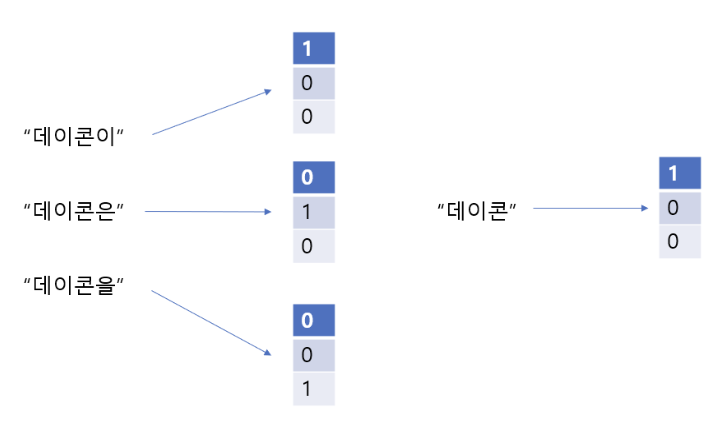

- 문장을 띄어쓰기 단위로 분류하여 vectorization을 하게 되면 "데이콘"이라는 같은 의미의 토큰 세개가 서로 다른 vector를 갖게 됩니다. 이렇게 되면 모델이 세 단어를 각각 다른 단어로 이해합니다. 하지만 형태소 분석을 통해 "데이콘"이라는 토큰을 추출한다면 앞의 세 단어는 동일한 vector를 갖게되며 모델이 해당 토큰을 더 잘 학습하는 데 도움이 됩니다.
- 형태소 분석은 어쩌면 모델링보다 성능에 더 중요한 영향을 미치는 아주 중요한 과정입니다. 시간이 허락한다면 다양한 형태소 분석기를 사용하여 결과를 비교하는 것을 추천드립니다.

### 1-1 Kkma()

In [10]:
pip install konlpy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 32.0 MB/s eta 0:00:00


In [11]:
from konlpy.tag import Kkma
kkma = Kkma()

sentence = '데이콘에서 다양한 컴피티션을 즐기면서 실력있는 데이터 분석가로 성장하세요!!.'

print("형태소 단위로 문장 분리")
print("----------------------")
print(kkma.morphs(sentence))
print(" ")
print("문장에서 명사 추출")
print("----------------------")
print(kkma.nouns(sentence))
print(" ")
print("품사 태킹(PoS)")
print("----------------------")
print(kkma.pos(sentence))

형태소 단위로 문장 분리
----------------------
['데이', '콘', '에서', '다양', '하', 'ㄴ', '컴피티션', '을', '즐기', '면서', '실력', '있', '는', '데이터', '분석가', '로', '성장', '하', '세요', '!!', '.']
 
문장에서 명사 추출
----------------------
['데이', '데이콘', '콘', '다양', '컴피티션', '실력', '데이터', '분석가', '성장']
 
품사 태킹(PoS)
----------------------
[('데이', 'NNG'), ('콘', 'NNG'), ('에서', 'JKM'), ('다양', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('컴피티션', 'UN'), ('을', 'JKO'), ('즐기', 'VV'), ('면서', 'ECE'), ('실력', 'NNG'), ('있', 'VV'), ('는', 'ETD'), ('데이터', 'NNG'), ('분석가', 'NNG'), ('로', 'JKM'), ('성장', 'NNG'), ('하', 'XSV'), ('세요', 'EFN'), ('!!', 'SW'), ('.', 'SF')]


### 1-2 Okt()

In [12]:
from konlpy.tag import Okt
Okt = Okt()

sentence = '데이콘에서 다양한 컴피티션을 즐기면서 실력있는 데이터 분석가로 성장하세요!!.'

print("형태소 단위로 문장 분리")
print("----------------------")
print(Okt.morphs(sentence))
print(" ")
print("문장에서 명사 추출")
print("----------------------")
print(Okt.nouns(sentence))
print(" ")
print("품사 태킹(PoS)")
print("----------------------")
print(Okt.pos(sentence))

형태소 단위로 문장 분리
----------------------
['데', '이콘', '에서', '다양한', '컴피티션', '을', '즐기면서', '실력', '있는', '데이터', '분석', '가로', '성장하세요', '!!.']
 
문장에서 명사 추출
----------------------
['데', '이콘', '컴피티션', '실력', '데이터', '분석', '가로']
 
품사 태킹(PoS)
----------------------
[('데', 'Noun'), ('이콘', 'Noun'), ('에서', 'Josa'), ('다양한', 'Adjective'), ('컴피티션', 'Noun'), ('을', 'Josa'), ('즐기면서', 'Verb'), ('실력', 'Noun'), ('있는', 'Adjective'), ('데이터', 'Noun'), ('분석', 'Noun'), ('가로', 'Noun'), ('성장하세요', 'Adjective'), ('!!.', 'Punctuation')]


### 1-3 Mecab()

이 외에도 Twitter, Komoran, Hannanum 등의 형태소 분석기(Pos Tagger)들이 존재합니다. 속도와 정확도 면에서 차이가 있으며 주로 Mecab 분석기를 이용합니다. 개인적인 경험에 기반한 결과를 공유하겠습니다.

- Mecab: 굉장히 속도가 빠르면서도 좋은 분석 결과를 보여준다.
- Komoran: 댓글과 같이 정제되지 않은 글에 대해서 먼저 사용해보면 좋다.(오탈자를 어느정도 고려해준다.)
- Kkma: 분석 시간이 오래걸리기 때문에 잘 이용하지 않게 된다.
- Okt: 품사 태깅 결과를 Noun, Verb등 알아보기 쉽게 반환해준다.
- khaiii: 카카오에서 가장 최근에 공개한 분석기, 성능이 좋다고 알려져 있으며 다양한 실험이 필요하다.

## 2. 표제어 추출(Lemmatization)

- 언어학을 전공하지 않은 사람에게 Lemmatization과 stemming은 큰 차이가 없다고 생각합니다. 모두 단어의 본 모습을 찾아주는 과정으로서 Konlpy에서 공개한 형태소 분석기들을 이용하면 어느 정도 어간 추출이 가능합니다. 형태소 분석(Pos Tagging)을 stemming이라고 표기한 이유도 이와 같습니다.

In [13]:
from konlpy.tag import Kkma
kkma = Kkma()

sentence = '성장했었다.'

print("품사 태킹(PoS)")
print("----------------------")
print(kkma.pos(sentence))

품사 태킹(PoS)
----------------------
[('성장', 'NNG'), ('하', 'XSV'), ('었', 'EPT'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF')]


In [14]:
sentence = '성장하였었다.'

print("품사 태킹(PoS)")
print("----------------------")
print(kkma.pos(sentence))

품사 태킹(PoS)
----------------------
[('성장', 'NNG'), ('하', 'XSV'), ('였', 'EPT'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF')]


## 3. 불용어 제거(Stopwords removing)

- 불용어를 간단하게 정의내리면 문장에서 큰 의미가 없다고 생각되는 단어, 글자들 입니다. 불용어는 데이터와 문제에 따라 유동적입니다. 다음과 같은 예시를 생각해 보겠습니다.

예시: "이번에 새롭게 개봉한 영화의 배우들은 모두 훌륭한 연기력과 아름다운 목소리를 갖고 있어!!"

- 예시 문장에서 감성분석을 진행할 때는 "훌륭한"과 "아름다운"등이 주요 특징으로 사용될 것입니다. 하지만 경우에 따라서는 이러한 형용사들을 제외한 배우들의 연기력과 목소리라는 정보에 집중해야 할 때가 있습니다. 이럴때는 "훌륭한"과 "아름다운"은 불용어로 정의될 수 있습니다.

In [18]:
from konlpy.tag import Okt

In [19]:
import re
tokenizer = Okt()
def text_preprocessing(text,tokenizer):
    
    stopwords = ['을', '를', '이', '가', '은', '는']
    
    txt = re.sub('[^가-힣a-z]', ' ', text)
    token = tokenizer.morphs(txt)
    token = [t for t in token if t not in stopwords]
        
    return token

ex_text = "이번에 새롭게 개봉한 영화의 배우들은 모두 훌륭한 연기력과 아름다운 목소리를 갖고 있어!!"
example_pre= text_preprocessing(ex_text,tokenizer)

위 코드의 설명입니다.

1. 영어 소문자와 한글을 제외한 모든 문자를 제거
2. Okt를 이용해 형태소 분석
3. 형태소 분석기를 거쳐 나온 결과들 중 stopwords 리스트에 포함되지 않는 토큰만 token이라는 리스트에 반환

In [20]:
print(example_pre)

['이번', '에', '새롭게', '개봉', '한', '영화', '의', '배우', '들', '모두', '훌륭한', '연기력', '과', '아름다운', '목소리', '갖고', '있어']


## 4. 대회 적용

In [23]:
def text_preprocessing(text_list):
    
    stopwords = ['을', '를', '이', '가', '은', '는', 'null'] #불용어 설정
    tokenizer = Okt() #형태소 분석기 
    token_list = []
    
    for text in text_list:
        txt = re.sub('[^가-힣a-z]', ' ', text) #한글과 영어 소문자만 남기고 다른 글자 모두 제거
        token = tokenizer.morphs(txt) #형태소 분석
        token = [t for t in token if t not in stopwords or type(t) != float] #형태소 분석 결과 중 stopwords에 해당하지 않는 것만 추출
        token_list.append(token)
        
    return token_list, tokenizer


# Vectorization

- NLP를 컴퓨터가 이해할 수 있게 수치로 바꾸는 것을 말합니다.이 때 벡터로 변환된 고유의 토큰들이 모인 집합을 vocabulary 하며 vocabulary가 크면 클수록 학습이 오래 걸리게 됩니다. 다양한 벡터화 함수들이 존재하지만 이번 노트북에서는 가장 기본적이며 많이 쓰이는 세 가지를 소개하겠습니다.

In [24]:
from konlpy.tag import Okt
import re

Okt = Okt()

sentences = ['자연어 처리는 정말 정말 즐거워.', '즐거운 자연어 처리 다같이 해보자.']
tokens = []

for sentence in sentences:
    sentence = re.sub('[^가-힣a-z]', ' ', sentence) #간단한 전처리
    token = (Okt.morphs(sentence)) #형태소 분석기를 이용햔 토큰 나누기
    tokens.append(' '.join(token))

print("형태소 단위로 문장 분리")
print("----------------------")
print(tokens)

형태소 단위로 문장 분리
----------------------
['자연어 처리 는 정말 정말 즐거워', '즐거운 자연어 처리 다 같이 해보자']


### 1. One Hot Encoding

- 해당 단어가 존재하면 1, 그렇지 않으면 모두 0으로 표시되는 기법입니다. keras를 이용하면 쉽게 구현이 가능하며 texts_to_sequences를 활용해 각 토큰에 고유한 정수를 부여한 후 to_categorical을 활용하면 간단하게 구현이 가능합니다.

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

t = Tokenizer()
t.fit_on_texts(tokens)
print("각 토큰에게 고유의 정수 부여")
print("----------------------")
print(t.word_index) 
print(" ")

s1=t.texts_to_sequences(tokens)[0] 
print("부여된 정수로 표시된 문장1")
print("----------------------")
print(s1)
print(" ")

s2=t.texts_to_sequences(tokens)[1]
print("부여된 정수로 표시된 문장2")
print("----------------------")
print(s2)
print(" ")

s1_one_hot = to_categorical(s1)
print("문장1의 one-hot-encoding")
print("----------------------")
print(s1_one_hot)
print(" ")

s2_one_hot = to_categorical(s2)
print("문장2의 one-hot-encoding")
print("----------------------")
print(s2_one_hot)

각 토큰에게 고유의 정수 부여
----------------------
{'자연어': 1, '처리': 2, '정말': 3, '는': 4, '즐거워': 5, '즐거운': 6, '다': 7, '같이': 8, '해보자': 9}
 
부여된 정수로 표시된 문장1
----------------------
[1, 2, 4, 3, 3, 5]
 
부여된 정수로 표시된 문장2
----------------------
[6, 1, 2, 7, 8, 9]
 
문장1의 one-hot-encoding
----------------------
[[0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]
 
문장2의 one-hot-encoding
----------------------
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


### 2. Count vectorization

- 이 방식은 vocabulary를 활용하여 각 문장이 갖고 있는 토큰의 count를 기반으로 문장을 vectorization 해줍니다. 아래 예시를 통해 알아봅시다

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(tokens) #여러 개의 문장을 넣어줘야 작동합니다!!

print(vectorizer.get_feature_names_out())
print(vectors.toarray())

['같이' '자연어' '정말' '즐거운' '즐거워' '처리' '해보자']
[[0 1 2 0 1 1 0]
 [1 1 0 1 0 1 1]]


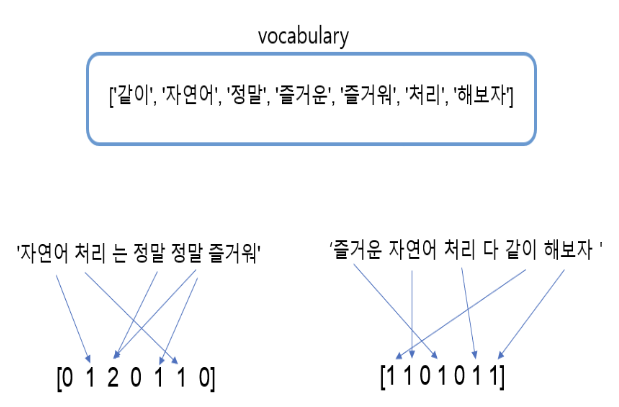

- 벡터화 결과 각 문장은 vocabulary의 인덱스를 기준으로 카운트가 정수로 표시된 것을 알 수 있습니다.
아쉬운 점은 sklearn의 CountVectorizer는 한 글자는 자동으로 제거해주네요
- 또한, 이 부분에서 형태소 분석기의 중요성에 대해서 알 수 있습니다. 즐거운과 즐거워는 같은 의미를 갖는 토큰이지만 okt는 이를 구분해주지 못해서 다른 토큰으로 분리가 되었습니다. 이는 모델에서 같은 의미의 토큰을 다르게 학습할 수 있음을 의미합니다.

### 3. Tfldf

- TfIdf의 핵심은 다음의 두 가지 입니다.
1. 단어가 몇번 등장 했는지에 대한 정보
2. 어떤 단어가 언급된 문서의 수가 적다면 그 단어는 문서를 분류하는데 있어서 중요한 단어
즉 등장 횟수도 많고 문서 분별력 있는 단어들을 점수화하여 벡터화를 한 것이 TfIdf 기법입니다.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=0)
tfidf_vectorizer = tfidf.fit_transform(tokens) 

#tf-idf dictionary    
tfidf_dict = tfidf.get_feature_names_out()
print(tfidf_dict)
print(tfidf_vectorizer.toarray())

['같이' '자연어' '정말' '즐거운' '즐거워' '처리' '해보자']
[[0.         0.29017021 0.81564821 0.         0.4078241  0.29017021
  0.        ]
 [0.49922133 0.35520009 0.         0.49922133 0.         0.35520009
  0.49922133]]


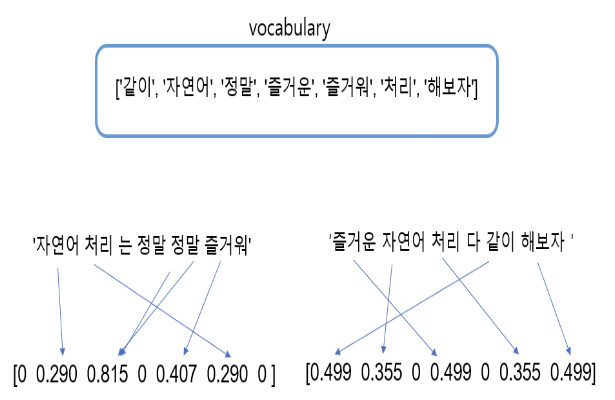

### 4. Padding

- 여기서 우리는 한 가지 궁금증이 생기게 됩니다. 우리가 사용하던 모델들은 DataFrame 형식의 row별 동일한 colum수를 갖는데 NLP에서는 row별(문장별) colum(토큰의 개수)가 같지 않아도 되는건가? 가변 길이의 문장들을 입력으로 넣어도 된다고?
- 가변 길이의 입력을 받는 모형들이 존재하지만 아쉽게도 기본적으로는 문장의 길이를 동일하게 맞춰주어야 합니다. 문장의 길이를 맞춰주기 위해 부족한 길이만큼 0을 채워넣게 되는데 우리는 이것을 Padding라고 부릅니다.

### 5. 대회 적용

In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def text2sequence(train_text, max_len=100):   
  tokenizer=Tokenizer() #keras의 vectorizing 함수 호출
  tokenizer.fit_on_texts(train_text) #train 문장에 fit
  train_X_seq=tokenizer.texts_to_sequences(train_text) #각 토큰들에 정수를 부여
  vocab_size=len(tokenizer.word_index)+1   #모델에 알려줄 vocabulary의 크기 계산
  print('vocab_size : ', vocab_size)
  X_train=pad_sequences(train_X_seq, maxlen=max_len) #설정한 문장의 최대 길이만큼 padding    
  return X_train, vocab_size, tokenizer

train_X, vocab_size, vectorizer=text2sequence(train['text'], max_len=100)

vocab_size :  42331
